<a href="https://colab.research.google.com/github/camposraiza/datascience/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Bergamo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Bergamo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/italy/lombardia/bergamo/2020-04-28/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da  propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15526,Ca' laRipa: Residenza PALAZZO lake view,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78464,10.02629,Entire home/apt,82,3,34,2019-07-25,0.31,5,73
1,15542,Ca' laRipa: Suite PANORAMA facing the lake,60754,"Andrea, Maurizio, And Tina",NaN,Solto Collina,45.78354,10.02471,Entire home/apt,59,3,39,2020-02-07,0.40,5,139
2,31412,Cute and Cosy Terrace,134937,Elena,NaN,Bergamo,45.69052,9.67099,Entire home/apt,69,1,79,2020-02-23,0.80,8,298
3,116423,Casetta a 12km da lago d'iseo,588254,Angela,NaN,Bossico,45.82840,10.04476,Entire home/apt,41,2,8,2019-11-03,0.34,3,301
4,130750,Nice apartment on quiet hill,643554,Sergio,NaN,Rota d'Imagna,45.83829,9.51059,Entire home/apt,50,7,0,NaN,NaN,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 2488
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
As variáveis reviews_per_month e last_review possuem 20% de valores nulos em suas linhas.
A variável host_name têm aproximadamente 0,01% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.233923
last_review                       0.233923
host_name                         0.000402
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

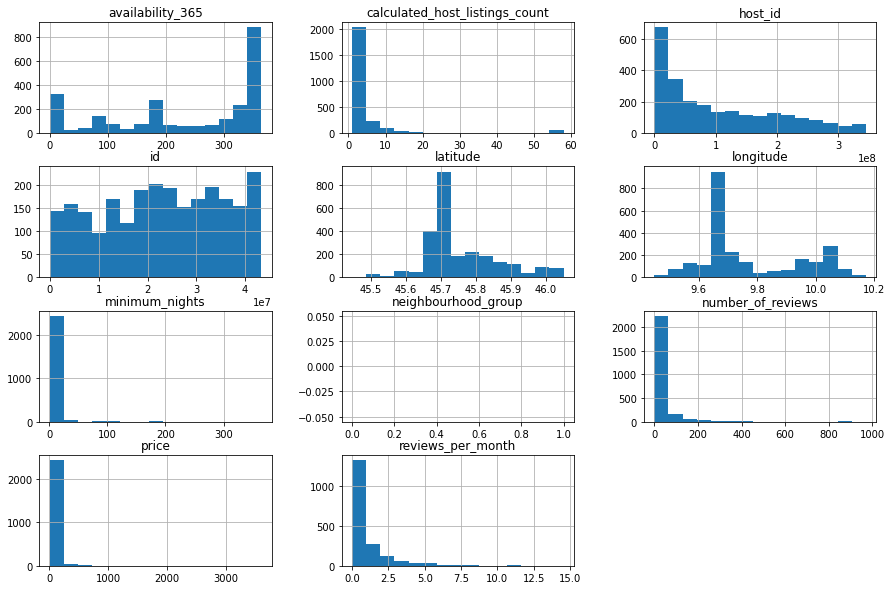

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df[['price']].describe()


,price
count,2488.000000
mean,75.623794
std,113.554505
min,9.000000
25%,45.000000
50%,60.000000
75%,80.000000
max,3600.000000


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2488.000000,2488.000000,2488.000000,1906.000000,2488.000000,2488.000000
mean,75.623794,3.114952,24.362138,1.069502,4.147106,233.542203
std,113.554505,11.839856,57.162656,1.653370,8.846503,131.508836
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,1.000000,0.160000,1.000000,124.000000
50%,60.000000,1.000000,5.000000,0.430000,2.000000,283.500000
75%,80.000000,2.000000,23.000000,1.240000,4.000000,358.000000
max,3600.000000,365.000000,970.000000,14.560000,58.000000,365.000000


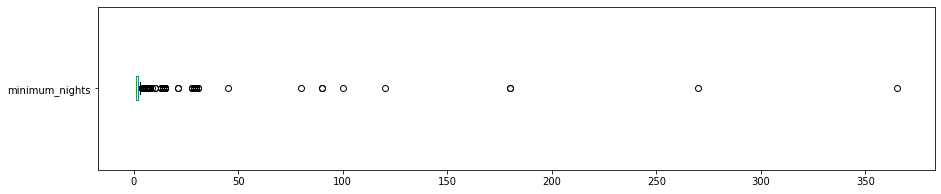

minimum_nights: valores acima de 30:
12 entradas
0.4823%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

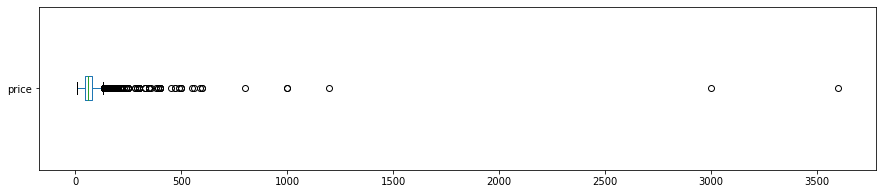


price: valores acima de 1500
2 entradas
0.0804%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

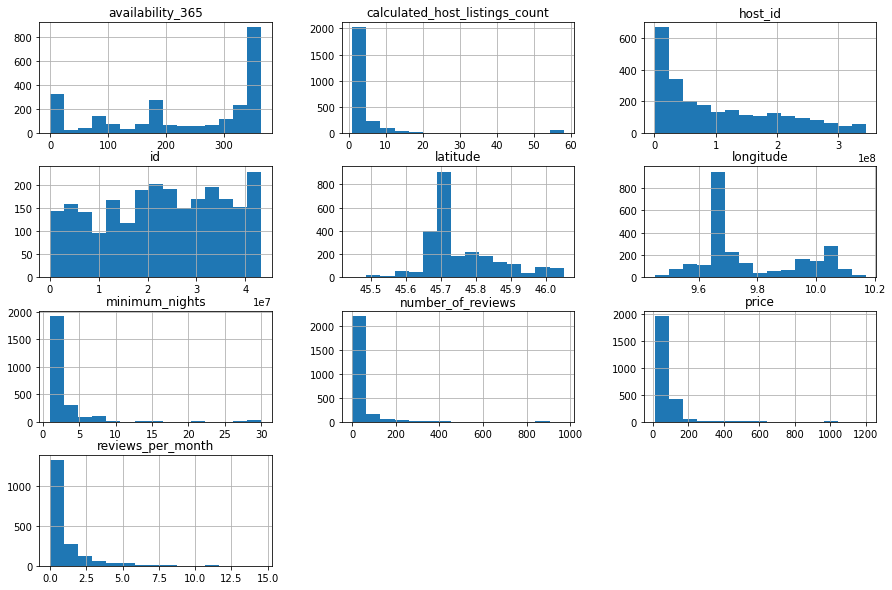

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
# criar uma matriz de correlação

# mostrar a matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.033140,-0.108684,-0.148978,0.097251,0.089449
minimum_nights,-0.033140,1.000000,-0.102472,-0.147741,-0.056479,-0.046848
number_of_reviews,-0.108684,-0.102472,1.000000,0.799152,-0.067554,0.046666
reviews_per_month,-0.148978,-0.147741,0.799152,1.000000,-0.069289,0.003612
calculated_host_listings_count,0.097251,-0.056479,-0.067554,-0.069289,1.000000,0.177283
availability_365,0.089449,-0.046848,0.046666,0.003612,0.177283,1.000000


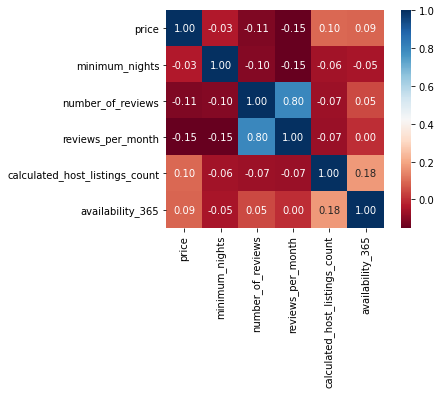

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1832
Private room        571
Hotel room           59
Shared room          12
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.740501
Private room       0.230800
Hotel room         0.023848
Shared room        0.004850
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lurano                   330.000000
Cisano Bergamasco        234.000000
Gandino                  200.000000
Cenate Sopra             195.000000
Almenno San Salvatore    180.000000
Carobbio degli Angeli    170.000000
Villa d'Adda             147.000000
Gazzaniga                139.500000
Costa Volpino            135.166667
Arcene                   132.000000
Name: price, dtype: float64

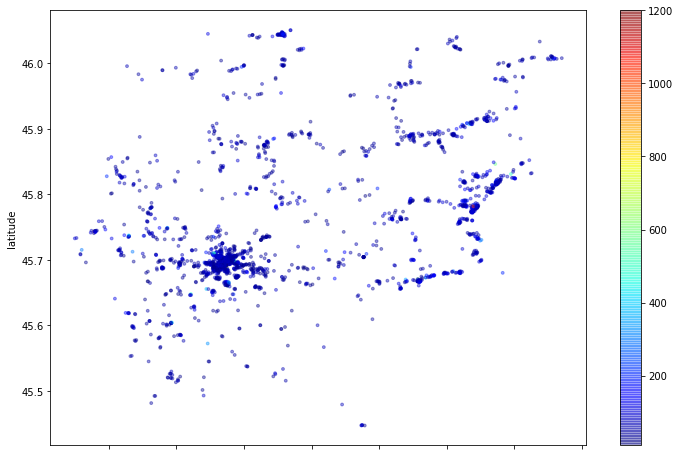

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df[['minimum_nights']].describe()

,minimum_nights
count,2488.000000
mean,3.114952
std,11.839856
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,365.000000


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### Análise realizada como parte das atividades do curso **Data Science na Prática 2.0** *by [sigmoidal.ai](https://sigmoidal.ai)*


